In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.tree import DecisionTreeRegressor,plot_tree

In [2]:
data = pd.read_csv("../Python ile Makine Öğrenmesi/Position_Salaries.csv")
data2 = data.copy()
data2.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [3]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 372.0+ bytes


In [4]:
y = data2["Salary"]
X = data2["Level"]

y = np.array(y).reshape(-1,1)
X = np.array(X).reshape(-1,1)

In [6]:
dtr = DecisionTreeRegressor(random_state=3)
dtr.fit(X,y)
predictions = dtr.predict(X)

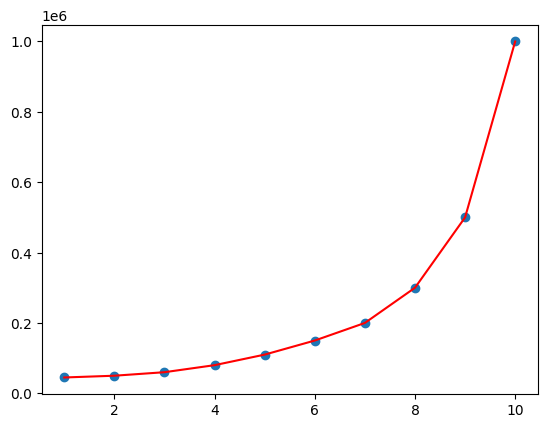

In [10]:
plt.scatter(X,y)
plt.plot(X,predictions,color="red")

Burada her hangi bir hiperparametre vermediğimiz için modelimiz aşırı uyum sorunu yaşıyor. Burada vermediğimiz hiper parametremiz max_leaf_nodes yani maksimum dal sayısı denebilir. Şimdi bir de bunu vererek deneyelim. Tahmin edileceği gibi bir hiperparametre olması hasebiyle bunu da optimize ederek kullanmamız lazım. Bunu bir sonraki uygulamada yapacağım.

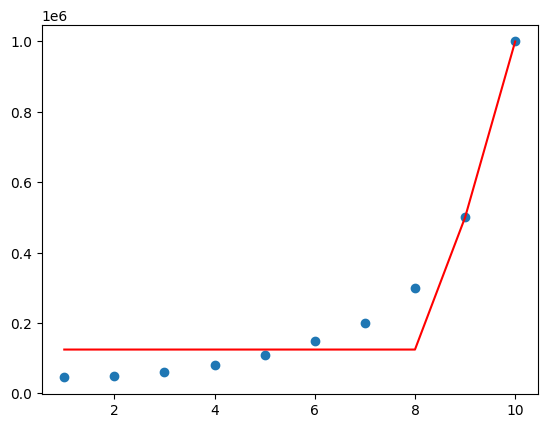

In [12]:
dtr2 = DecisionTreeRegressor(random_state=3,max_leaf_nodes=3) # yine rastgele bir değer verdim
dtr2.fit(X,y)
predictions2 = dtr2.predict(X)

plt.scatter(X,y)
plt.plot(X,predictions2,color="red") 
# görüldüğü üzere modelin çıktısı artık verilen hiperparametreye uygun çıktı verdi

Burada çizim için yine sklearn.tree kısmında plot_tree denen bir yapı ile ağacımızı çizebiliriz. 

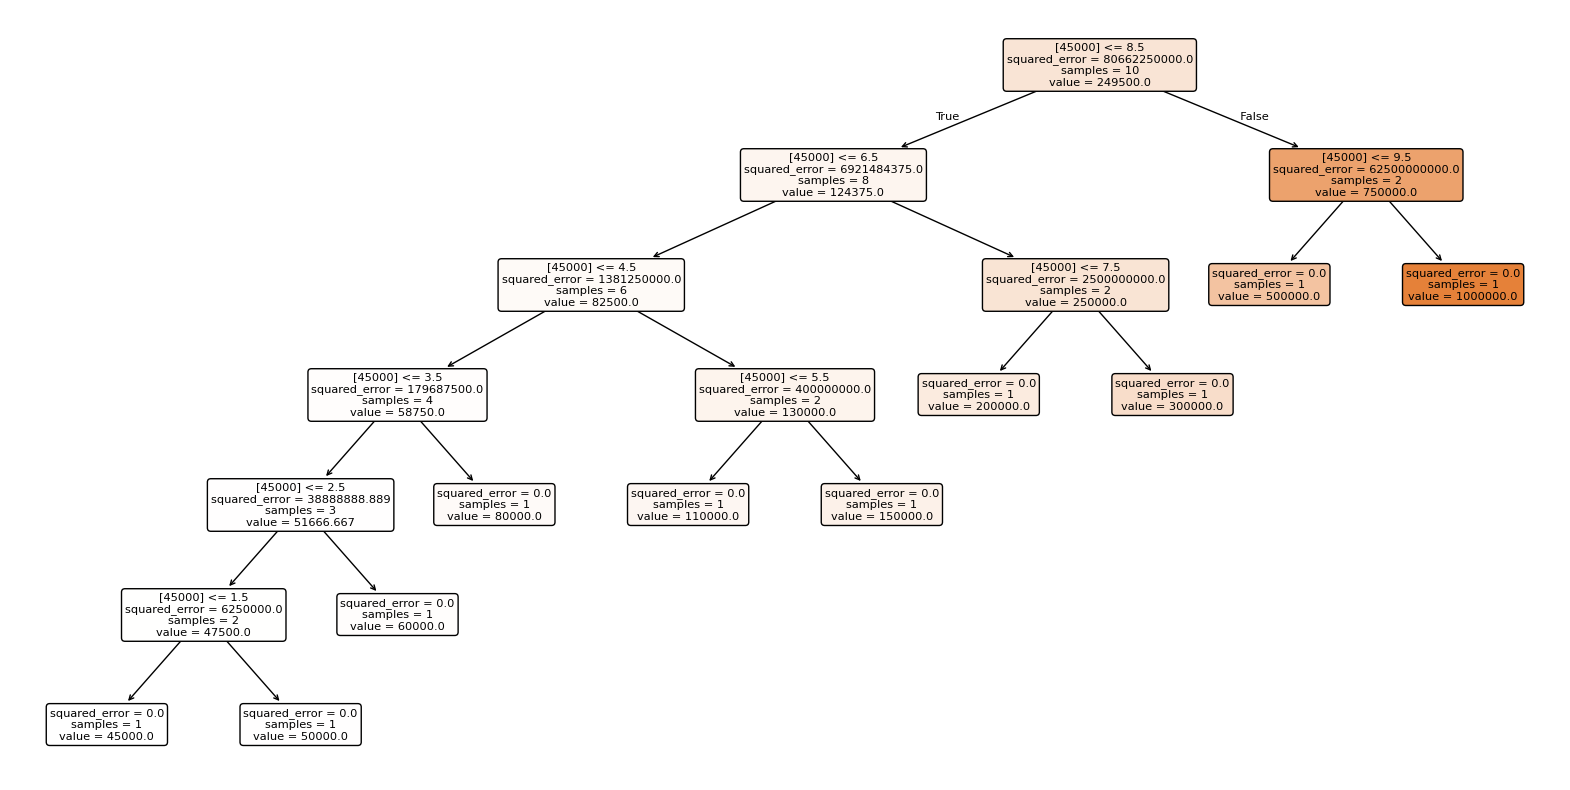

In [17]:
plt.figure(figsize=(20,10),dpi=100)
#plot_tree(dtr,feature_names="Level",class_names="Salary",rounded=True,filled=True)
# bu şekilde veremeyiz array veya benzeri vermemiz lazım yani ya seri vereceğiz ya da array vereceğiz
plot_tree(dtr,feature_names=y,class_names=X,rounded=True,filled=True)
plt.show()

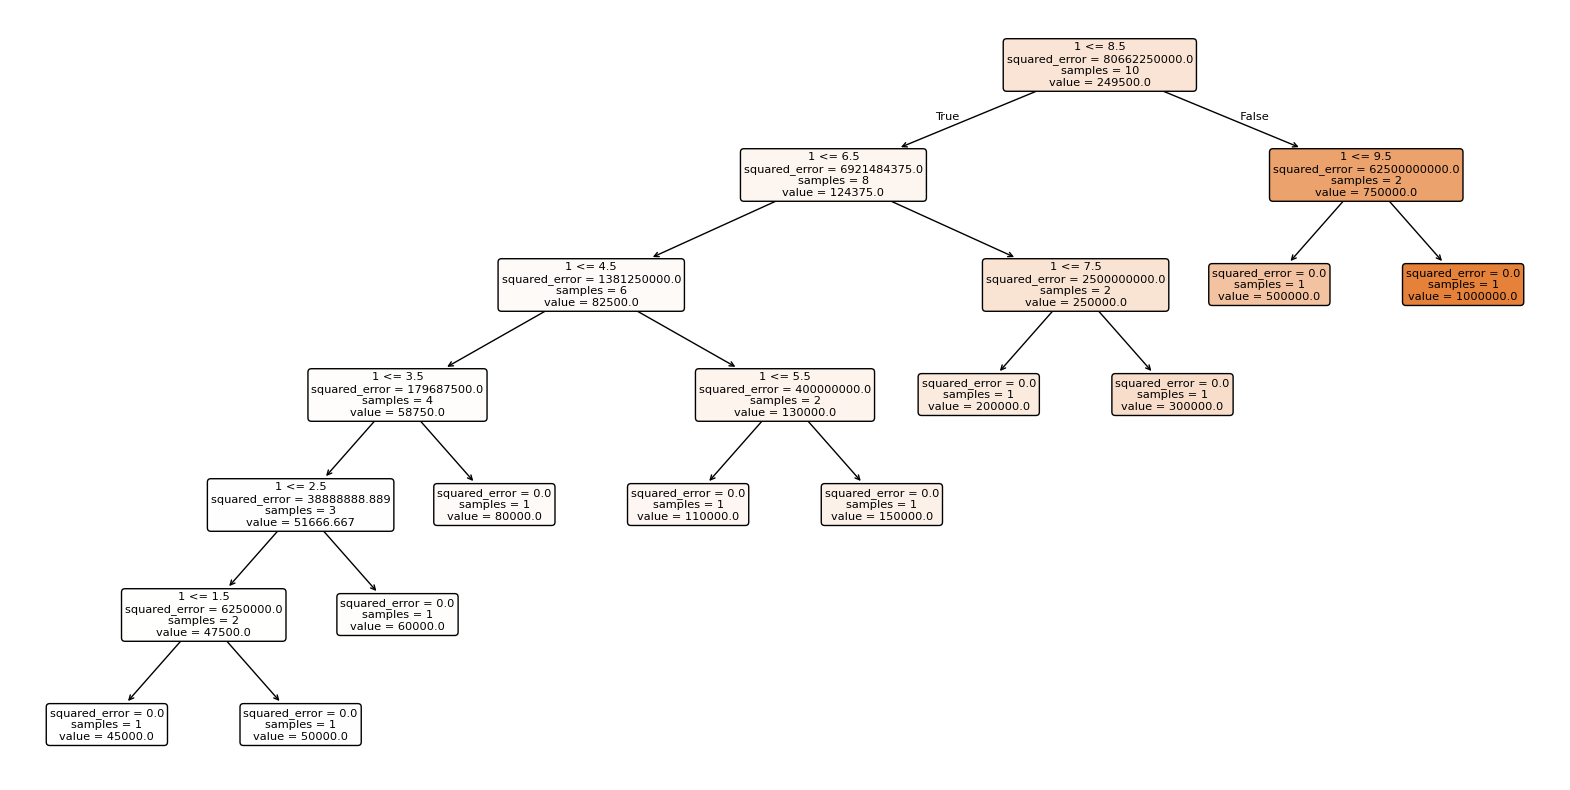

In [18]:
# yukarıdaki alınan hatalardan biri insanlar sık almış nedeni bu idi farklı bir çözümü seri ile 
# yine aynı şey olacak tabi ama olsun bilmekte fayda var dökümantasyonu okumanın faydaları
plt.figure(figsize=(20,10),dpi=100)
plot_tree(dtr,feature_names=data2["Level"],class_names=data2["Salary"],rounded=True,filled=True)
plt.show()

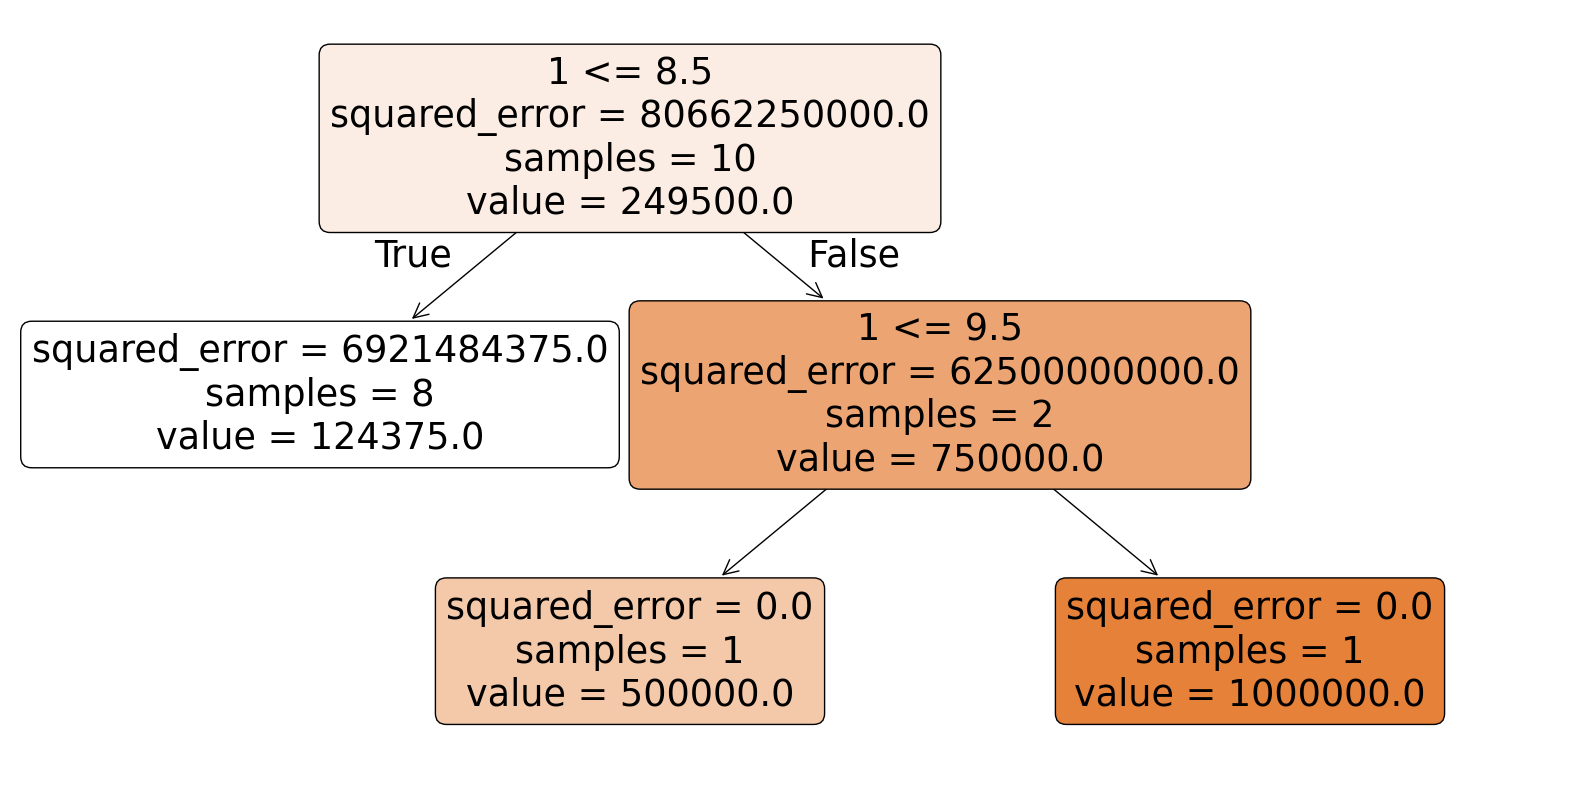

In [19]:
# şimdi max_leaf_nodes 3 verdiğimiz durumu görelim 
plt.figure(figsize=(20,10),dpi=100)
plot_tree(dtr2,feature_names=data2["Level"],class_names=data2["Salary"],rounded=True,filled=True)
plt.show()


Çıktıyı okuyacak olursak daha önce konu anlatımındaki herşey burada aslında squared_error hata değerini ölçüyor. Samples bu node de kaçtane veri olduğunu yani bu koşula uyan kaç tane örneklem var bunu gösteriyor. Value ise bu gözlemlerin ortalama değerlerini buluyor. np.mean() kullanarak isterseniz kontrol edebilirsiniz. Standartlaştırma yapmadık burada burada çok da zorunlu değil. O yüzden kullanmadık kullanılması gerektiği düşünülen problemlerde kullanılabilir. 